In [171]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt
import seaborn as sns

In [172]:
house_data_root = pd.read_csv('./train.csv')

<h3>[Problem 1] Feature selection for practice</h3>

In [173]:
house_data1 = pd.DataFrame({
            'SalePrice': house_data_root['SalePrice'],
            'GrLivArea': house_data_root['GrLivArea'],
            'YearBuilt': house_data_root['YearBuilt']
})

display(house_data1.info())
display(house_data1.describe())
display(house_data1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 3 columns):
SalePrice    1460 non-null int64
GrLivArea    1460 non-null int64
YearBuilt    1460 non-null int64
dtypes: int64(3)
memory usage: 34.3 KB


None

,SalePrice,GrLivArea,YearBuilt
count,1460.000000,1460.000000,1460.000000
mean,180921.195890,1515.463699,1971.267808
std,79442.502883,525.480383,30.202904
min,34900.000000,334.000000,1872.000000
25%,129975.000000,1129.500000,1954.000000
50%,163000.000000,1464.000000,1973.000000
75%,214000.000000,1776.750000,2000.000000
max,755000.000000,5642.000000,2010.000000


SalePrice    0
GrLivArea    0
YearBuilt    0
dtype: int64

In [174]:
x1 = np.array(house_data_root['GrLivArea']).reshape(np.array(house_data_root['GrLivArea']).size, 1)
x2 = np.array(house_data_root['YearBuilt']).reshape(np.array(house_data_root['YearBuilt']).size, 1)

X = np.concatenate((x1, x2), axis=1)
y = np.array(house_data_root['SalePrice'])

display(X)
display(y)

array([[1710, 2003],
       [1262, 1976],
       [1786, 2001],
       ...,
       [2340, 1941],
       [1078, 1950],
       [1256, 1965]])

array([208500, 181500, 223500, ..., 266500, 142125, 147500])

In [175]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=69)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1095, 2)
(365, 2)
(1095,)
(365,)


In [176]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

print(scaler.mean_)
display(X_train_std[0:5])
display(X_test_std[0:5])

[1516.76255708 1971.14155251]


array([[ 0.81017272,  0.71802746],
       [ 0.5215198 ,  1.14506405],
       [ 0.8176702 ,  0.68517849],
       [ 3.30308428,  1.04651714],
       [-1.26662879, -0.6944782 ]])

array([[-1.94327621, -0.72732717],
       [ 2.04913102,  1.17791302],
       [-1.38471408, -1.02296788],
       [ 0.36594713, -0.39883748],
       [-1.1672872 ,  0.09389705]])

<h3>[Problem 2] Estimation and evaluation by linear regression</h3>

<h4>Training and estimation</h4>

In [177]:
lr = LinearRegression().fit(X_train_std, y_train)
y_lr_predict = reg.predict(X_test_std)

print("R^2 score: {}".format(lr.score(X_test_std, y_test)))
print("Coff: {}".format(lr.coef_))
print("Intercept: {}".format(lr.intercept_))

R^2 score: 0.6090147462372839
Coff: [52309.29312936 31624.42146867]
Intercept: 180683.82283105023


<h4>Evaluation</h4>

In [178]:
print("Mean Squared Error (MSE): {}".format(mean_squared_error(y_test, y_lr_predict)))

Mean Squared Error (MSE): 2213835906.9488573


<h4>Visualization</h4>

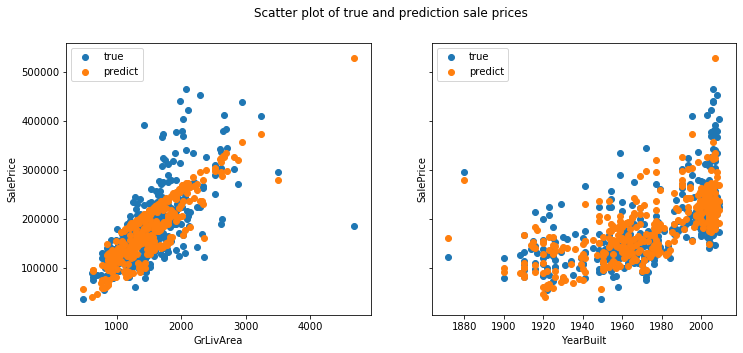

In [179]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
fig.suptitle("Scatter plot of true and prediction sale prices")

axes[0].scatter(X_test[:, 0], y_test, label="true")
axes[0].scatter(X_test[:, 0], y_lr_predict, label="predict")
axes[0].set_xlabel("GrLivArea")
axes[0].set_ylabel("SalePrice")
axes[0].legend()

axes[1].scatter(X_test[:, 1], y_test, label="true")
axes[1].scatter(X_test[:, 1], y_lr_predict, label="predict")
axes[1].set_xlabel("YearBuilt")
axes[1].set_ylabel("SalePrice")
axes[1].legend()

<h3>[Problem 3] Comparison of methods</h3>

In [180]:
svr = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2)).fit(X_train_std, y_train)
y_svr_predict = svr.predict(X_test_std)

dt = DecisionTreeRegressor(random_state=0).fit(X_train_std, y_train)
y_dt_predict = dt.predict(X_test_std)

rf = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train_std, y_train)
y_rf_predict = rf.predict(X_test_std)

In [181]:
y_predict_list = [y_lr_predict, y_svr_predict, y_dt_predict, y_rf_predict]

In [182]:
r2_score = [
        lr.score(X_test_std, y_test), 
        svr.score(X_test_std, y_test), 
        dt.score(X_test_std, y_test), 
        rf.score(X_test_std, y_test)
]

mse = [
    mean_squared_error(y_test, y_lr_predict),
    mean_squared_error(y_test, y_svr_predict),
    mean_squared_error(y_test, y_dt_predict),
    mean_squared_error(y_test, y_rf_predict),
]

model = ['LR', 'SVR', 'DT', 'RF']

score_table = pd.DataFrame({
            "Model": model,
            "R^2 score": r2_score,
            "MSE": mse
})

display(score_table)

,Model,R^2 score,MSE
0,LR,0.609015,2.213836e+09
1,SVR,-0.068414,6.049569e+09
2,DT,0.416623,3.303196e+09
3,RF,0.606988,2.225312e+09


From the score table above, it can be seen that linear regression model is the suitable one to predict in this context with the highest R^2 score (0.609015) as well as the lowest MSE (2.213836e+09). In contrast, SVR model is not the suiable one to choose to predict in this context, which R^2 score is the lowest, and MSE is the highest.

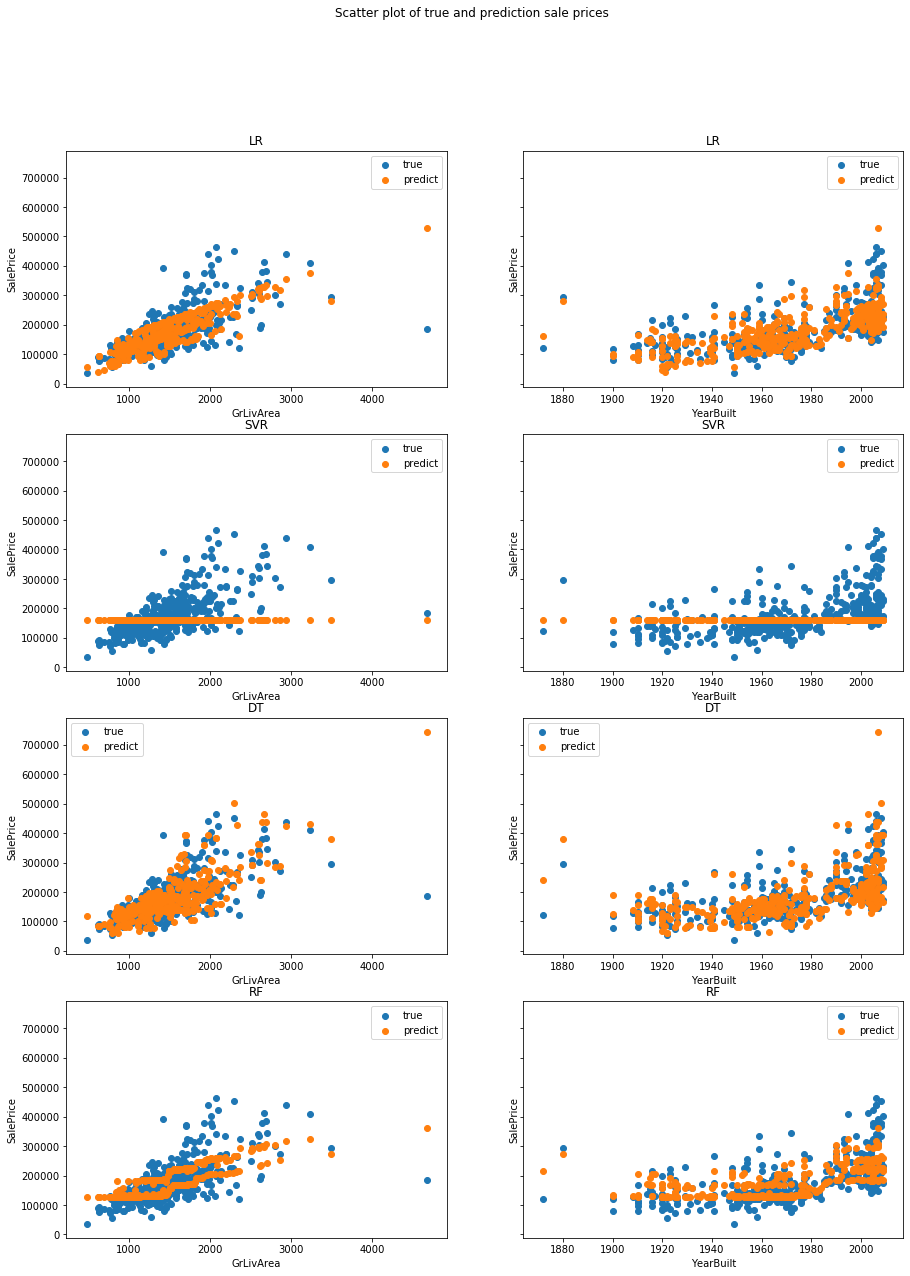

In [183]:
fig, axes = plt.subplots(4, 2, figsize=(15, 20), sharey=True)
fig.suptitle("Scatter plot of true and prediction sale prices")

for row, y_predict, mod in zip(range(0, 4), y_predict_list, model):
    for col in range(0, 2):
        axes[row, col].scatter(X_test[:, col], y_test, label="true")
        axes[row, col].scatter(X_test[:, col], y_predict, label="predict")
        axes[row, col].set_title(mod)
        axes[row, col].set_xlabel("GrLivArea" if (col == 0) else "YearBuilt")
        axes[row, col].set_ylabel("SalePrice")
        axes[row, col].legend()